# Crimes In Boston

## Load Libraries 

Using the Boston Crimes dataset, let's try to visualize the data and do analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from folium import Map, CircleMarker
from folium.plugins import HeatMap
from pandas.api.types import CategoricalDtype
from pylab import rcParams
import os

import warnings
warnings.filterwarnings("ignore")

print(os.listdir("input/Crimes_in_Boston"))

['Boston_Crimes.csv', 'offence_codes.xlsx']


## Import the Boston Crime Data

In [2]:
dataset = pd.read_csv("input/Crimes_in_Boston/Boston_Crimes.csv")
df = dataset.copy()

In [3]:
df.head()

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0      I192082859           724         Auto Theft   
1      I192082751           724         Auto Theft   
2      I192082680           727         Auto Theft   
3      I192082577           724         Auto Theft   
4      I192079582           727         Auto Theft   

                  OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                          AUTO THEFT      E18            519      NaN   
1                          AUTO THEFT      E18            493      NaN   
2  AUTO THEFT - LEASED/RENTED VEHICLE      D14            794      NaN   
3                          AUTO THEFT       D4            130      NaN   
4  AUTO THEFT - LEASED/RENTED VEHICLE      A15             47      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
0  2019-10-13 09:28:24  2019     10      Sunday     9  Part One   
1  2019-10-12 20:11:26  2019     10    Saturday    20  Part One   
2  2019-10-12 15:12:43  2019     10    Saturday    15  Part One   
3  2019-10-12 04:41:52  2019     10    Saturday     4  Part One   
4  2019-10-02 08:08:49  2019     10   Wednesday     8  Part One   

             STREET        Lat       Long                     Location  
0        LINCOLN ST  42.259518 -71.121563  (42.25951765, -71.12156299)  
1  METROPOLITAN AVE  42.262092 -71.116710  (42.26209214, -71.11670964)  
2        ALLSTON ST  42.352375 -71.135096  (42.35237455, -71.13509584)  
3   SAINT JAMES AVE  42.349476 -71.076402  (42.34947586, -71.07640150)  
4         N MEAD ST  42.381846 -71.066551  (42.38184582, -71.06655134)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426839 entries, 0 to 426838
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      426839 non-null  object 
 1   OFFENSE_CODE         426839 non-null  int64  
 2   OFFENSE_CODE_GROUP   426839 non-null  object 
 3   OFFENSE_DESCRIPTION  426839 non-null  object 
 4   DISTRICT             424670 non-null  object 
 5   REPORTING_AREA       426839 non-null  object 
 6   SHOOTING             1746 non-null    object 
 7   OCCURRED_ON_DATE     426839 non-null  object 
 8   YEAR                 426839 non-null  int64  
 9   MONTH                426839 non-null  int64  
 10  DAY_OF_WEEK          426839 non-null  object 
 11  HOUR                 426839 non-null  int64  
 12  UCR_PART             426729 non-null  object 
 13  STREET               414448 non-null  object 
 14  Lat                  399635 non-null  float64
 15  Long             

In [5]:
df.describe().T

count         mean          std          min          25%  \
OFFENSE_CODE  426839.0  2327.707632  1181.577366   111.000000  1102.000000   
YEAR          426839.0  2017.092391     1.283724  2015.000000  2016.000000   
MONTH         426839.0     6.646239     3.279190     1.000000     4.000000   
HOUR          426839.0    13.116880     6.298591     0.000000     9.000000   
Lat           399635.0    42.221633     2.084323    -1.000000    42.297105   
Long          399635.0   -70.920431     3.371583   -71.178674   -71.097223   

                      50%          75%          max  
OFFENSE_CODE  3001.000000  3201.000000  3831.000000  
YEAR          2017.000000  2018.000000  2019.000000  
MONTH            7.000000     9.000000    12.000000  
HOUR            14.000000    18.000000    23.000000  
Lat             42.325538    42.348546    42.395042  
Long           -71.077619   -71.062583    -1.000000

In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 2169
REPORTING_AREA              0
SHOOTING               425093
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                  110
STREET                  12391
Lat                     27204
Long                    27204
Location                    0
dtype: int64

## Percentage table of missing data

In [8]:
def missing_zero_values_table(df):
    zero_value = (df == 0.00).astype(int).sum(axis = 0)
    miss_value = df.isnull().sum()
    miss_value_per = (100 * df.isnull().sum()) / len(df)
    
    mz_table = pd.concat([zero_value, miss_value, miss_value_per], axis = 1)
    new_columns = {0 : "Zero Values", 1 : "Missing Values", 2 : "% of Total Values"} 
    mz_table = mz_table.rename(columns = new_columns)
    mz_table["Total Missing Zero Values"] = mz_table["Zero Values"] + mz_table["Missing Values"]
    mz_table["% Total Missing Zero Values"] = 100* mz_table["Total Missing Zero Values"] / len(df)
    mz_table["Data Type"] = df.dtypes
    mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values("% of Total Values", ascending = False).round(1)
    print("Your selected dataframe has " + str(mz_table.shape[0]) + " columns and "+ str(df.shape[0]) + " Rows.\n"
         "There are " + str(mz_table.shape[0]) + " columns that have missing values.")
    return mz_table
missing_zero_values_table(df)

Your selected dataframe has 6 columns and 426839 Rows.
There are 6 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
SHOOTING            0          425093               99.6   
Lat                 0           27204                6.4   
Long                0           27204                6.4   
STREET              0           12391                2.9   
DISTRICT            0            2169                0.5   
UCR_PART            0             110                0.0   

          Total Missing Zero Values  % Total Missing Zero Values Data Type  
SHOOTING                     425093                         99.6    object  
Lat                           27204                          6.4   float64  
Long                          27204                          6.4   float64  
STREET                        12391                          2.9    object  
DISTRICT                       2169                          0.5    object  
UCR_PART                        110                          0.0    object

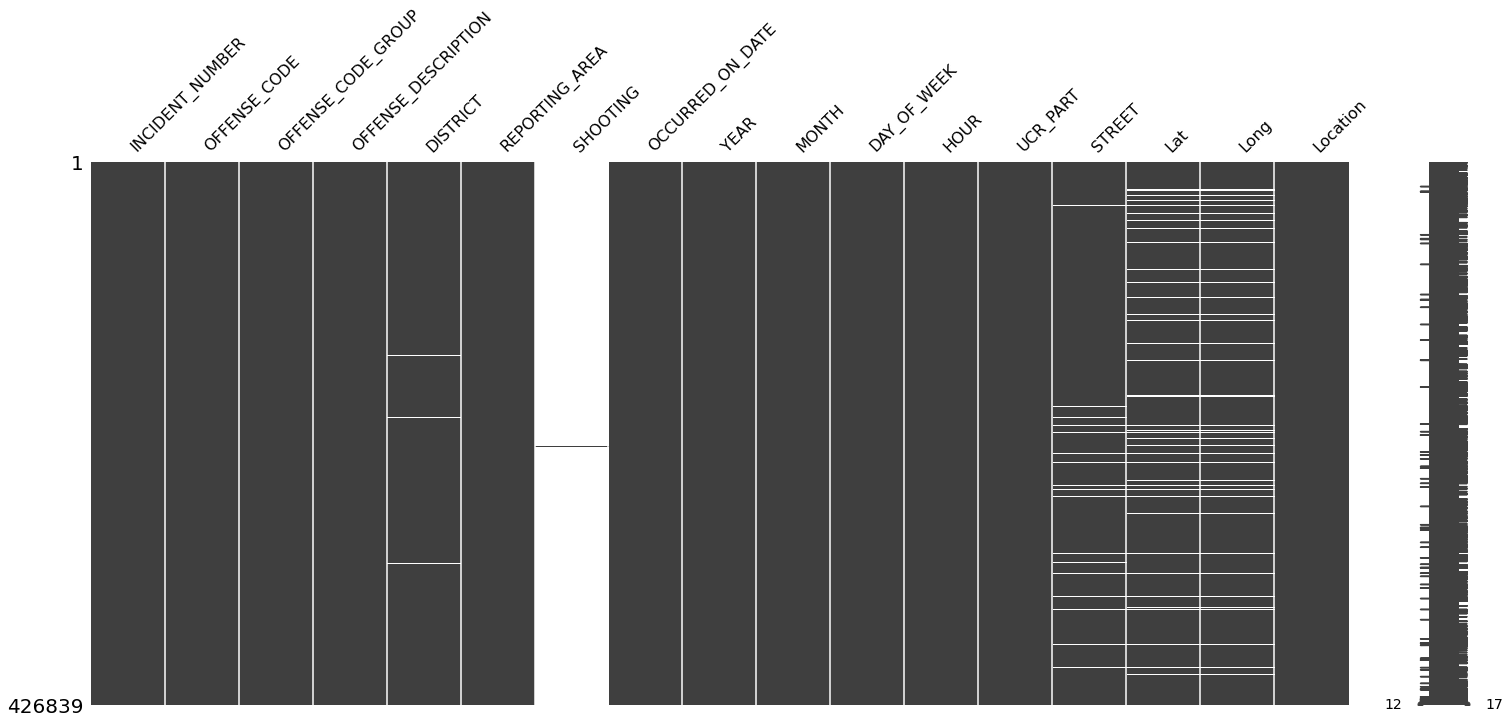

In [9]:
msno.matrix(df);

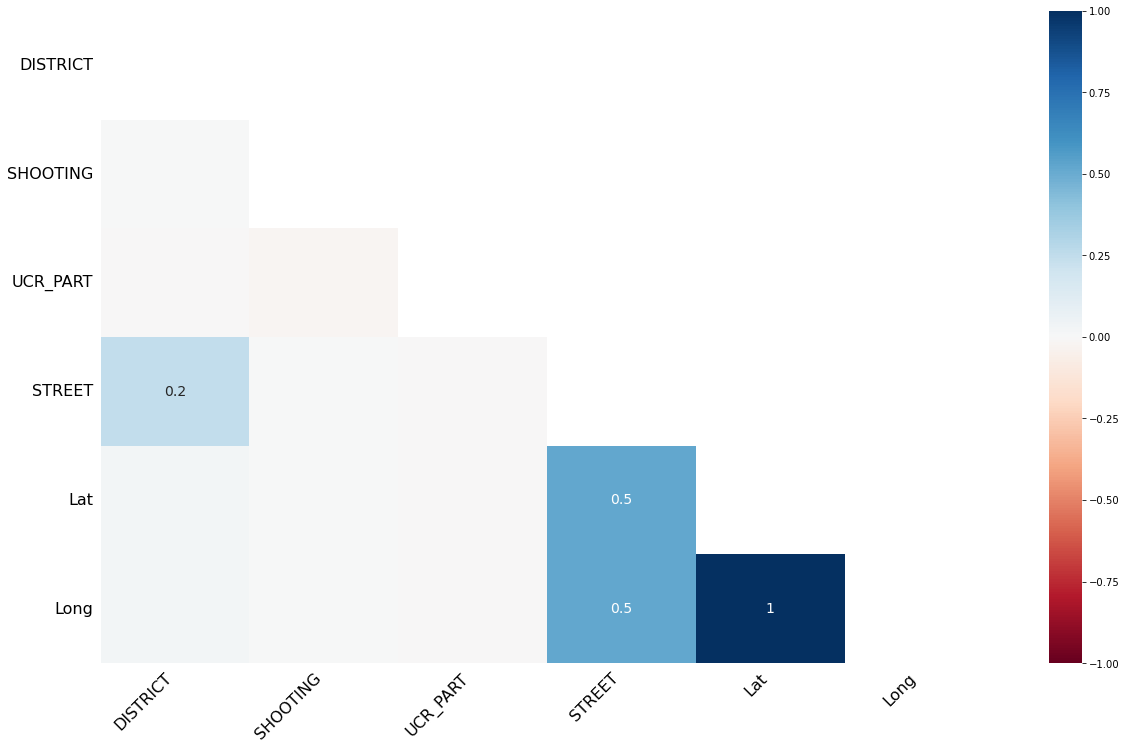

In [10]:
msno.heatmap(df);

In [11]:
df.drop(labels = "SHOOTING", axis = 1, inplace = True)

## Data Manipulation

In [12]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

df.OFFENSE_CODE_GROUP    = df.OFFENSE_CODE_GROUP.astype(CategoricalDtype())
df.OFFENSE_DESCRIPTION    = df.OFFENSE_DESCRIPTION.astype(CategoricalDtype())
df.DISTRICT    = df.DISTRICT.astype(CategoricalDtype())
df.DAY_OF_WEEK    = df.DAY_OF_WEEK.astype(CategoricalDtype())
df.UCR_PART    = df.UCR_PART.astype(CategoricalDtype())

In [13]:
rename = {'OFFENSE_CODE_GROUP':'Group',
          'SHOOTING':'Shooting',
          'OFFENSE_DESCRIPTION':'Description',
          'DISTRICT':'District',
          'STREET':'Street',        
          'OCCURRED_ON_DATE':'Date',
          'YEAR':'Year',
          'MONTH':'Month',
          'DAY_OF_WEEK':'Day',
          'HOUR':'Hour'}

df.rename(index=str, columns=rename, inplace=True)

In [14]:
def create_features(df):
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','dayofyear',
            'dayofmonth','weekofyear']]
    return X
create_features(df).head()

dayofweek  quarter  dayofyear  dayofmonth  weekofyear
0          6        4        286          13          41
1          5        4        285          12          41
2          5        4        285          12          41
3          5        4        285          12          41
4          2        4        275           2          40

In [15]:
df.quarter    = df.quarter.astype(CategoricalDtype())
df.dayofweek    = df.dayofweek.astype(CategoricalDtype())
df.dayofyear    = df.dayofyear.astype(CategoricalDtype())
df.dayofmonth    = df.dayofmonth.astype(CategoricalDtype())

In [16]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'Group', 'Description', 'District',
       'REPORTING_AREA', 'Date', 'Year', 'Month', 'Day', 'Hour', 'UCR_PART',
       'Street', 'Lat', 'Long', 'Location', 'dayofweek', 'quarter',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426839 entries, 0 to 426838
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   INCIDENT_NUMBER  426839 non-null  object        
 1   OFFENSE_CODE     426839 non-null  int64         
 2   Group            426839 non-null  category      
 3   Description      426839 non-null  category      
 4   District         424670 non-null  category      
 5   REPORTING_AREA   426839 non-null  object        
 6   Date             426839 non-null  datetime64[ns]
 7   Year             426839 non-null  int64         
 8   Month            426839 non-null  int64         
 9   Day              426839 non-null  category      
 10  Hour             426839 non-null  int64         
 11  UCR_PART         426729 non-null  category      
 12  Street           414448 non-null  object        
 13  Lat              399635 non-null  float64       
 14  Long             399635 n

# EDA (Exploratory Data Analysis)

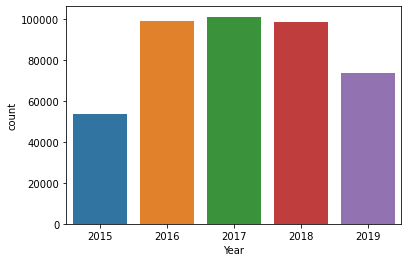

In [18]:
sns.countplot(data=df, x="Year");

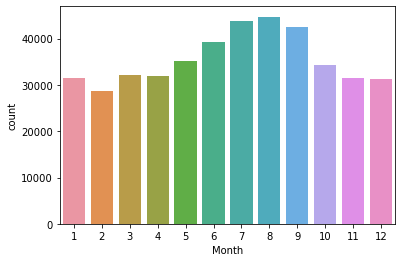

In [19]:
sns.countplot(x = "Month", data = df);

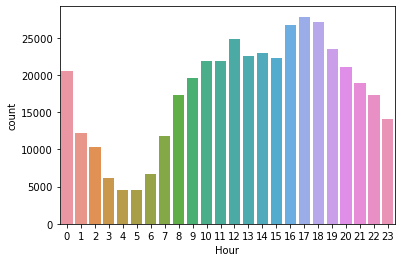

In [20]:
sns.countplot(x = "Hour", data = df);

In [21]:
df['Group'].value_counts().head(10).index

CategoricalIndex(['Motor Vehicle Accident Response', 'Larceny',
                  'Medical Assistance', 'Investigate Person', 'Other',
                  'Drug Violation', 'Simple Assault', 'Vandalism',
                  'Verbal Disputes', 'Investigate Property'],
                 categories=['Aggravated Assault', 'Aircraft', 'Arson', 'Assembly or Gathering Violations', 'Auto Theft', 'Auto Theft Recovery', 'Ballistics', 'Biological Threat', ...], ordered=False, dtype='category')

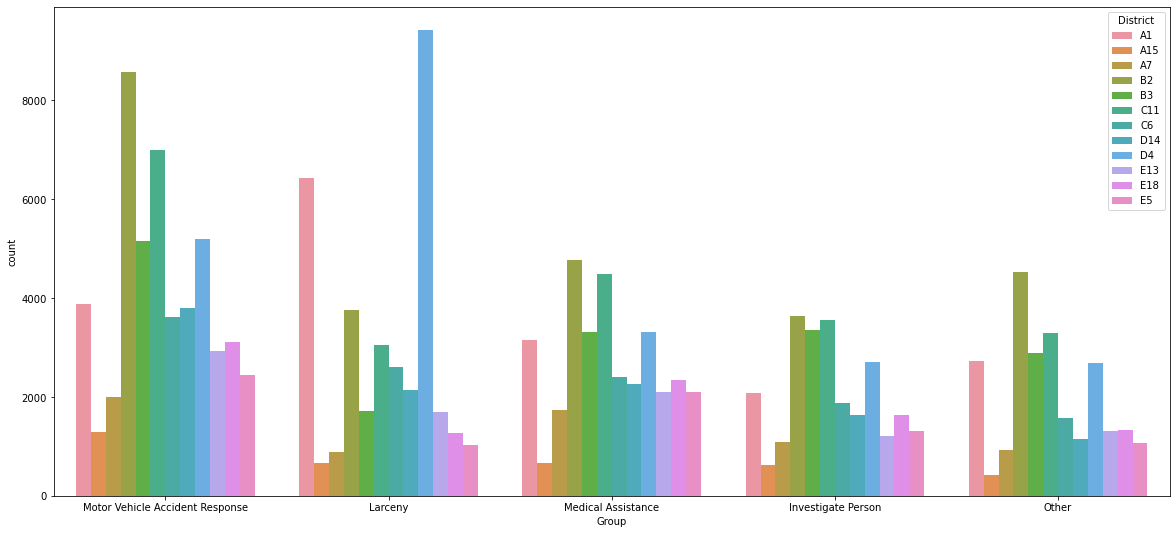

In [22]:
plt.figure(figsize = (20,9))
sns.countplot(data = df, x="Group",hue="District", order = df["Group"].value_counts().head(5).index);

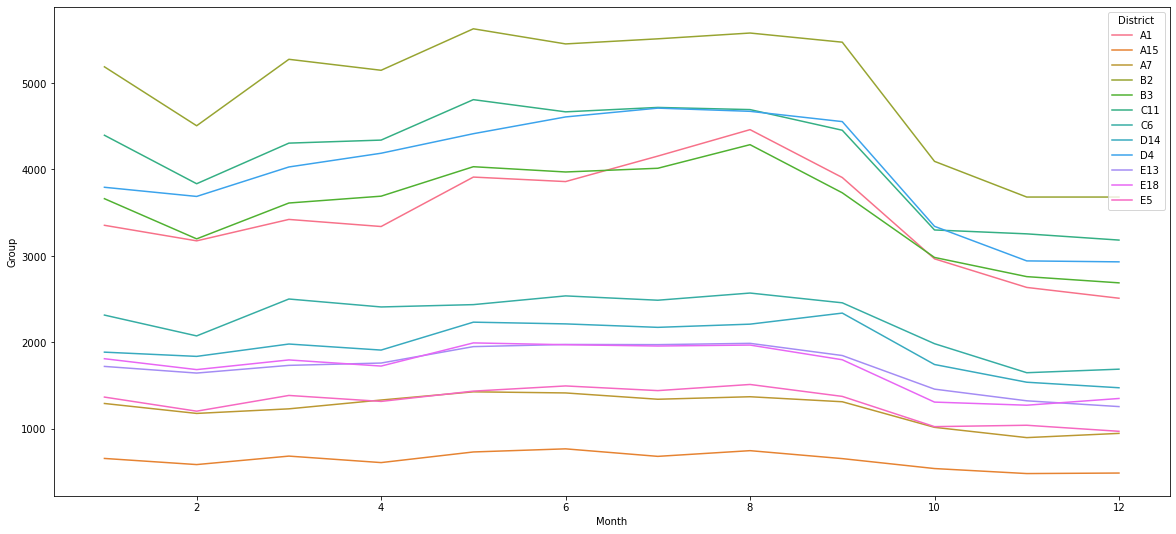

In [23]:
rcParams["figure.figsize"] = 20,9

mask = ((df["Year"] == 2016) | (df["Year"] == 2017) | (df["Year"] == 2018) | (df["Year"] == 2019))
groups = df[mask].groupby(["Month", "District"]).count()
sns.lineplot(x = "Month",
             y = "Group", 
             hue = "District", data = groups.reset_index());

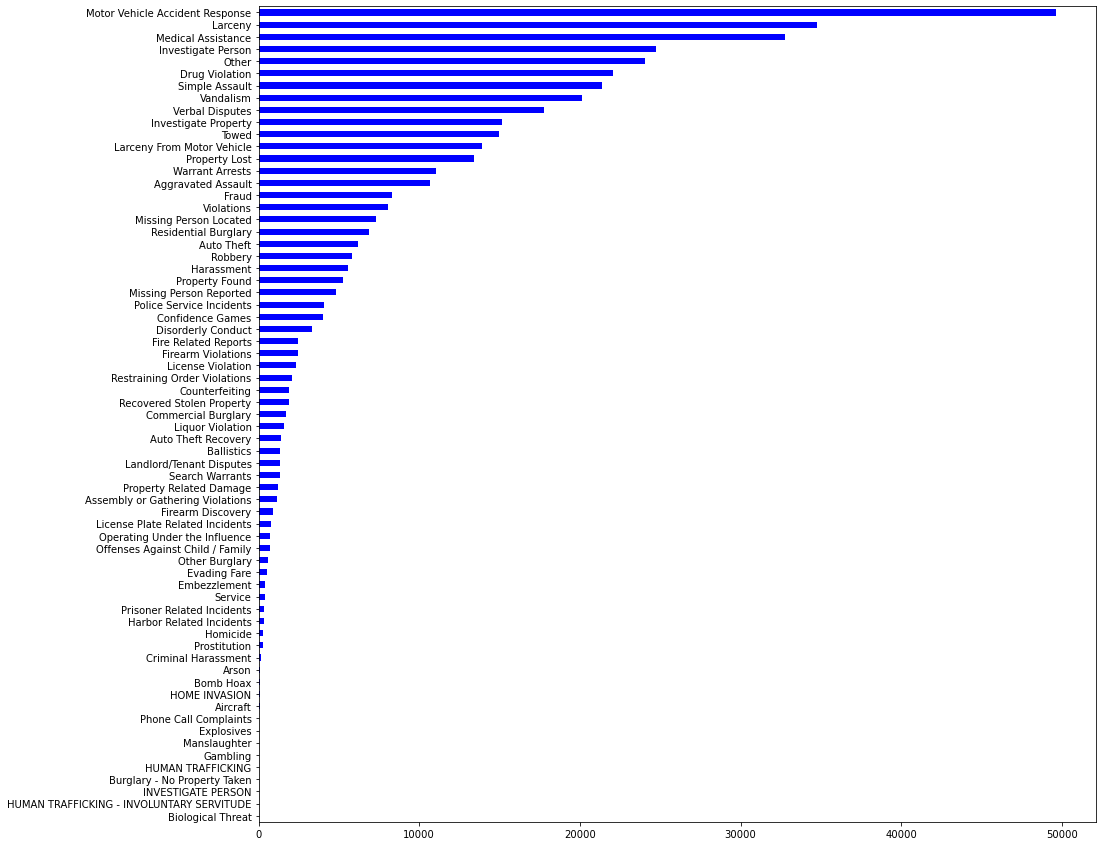

In [24]:
plt.figure(figsize = (15,15))
df["Group"].value_counts(ascending = True).plot.barh(color = "blue");

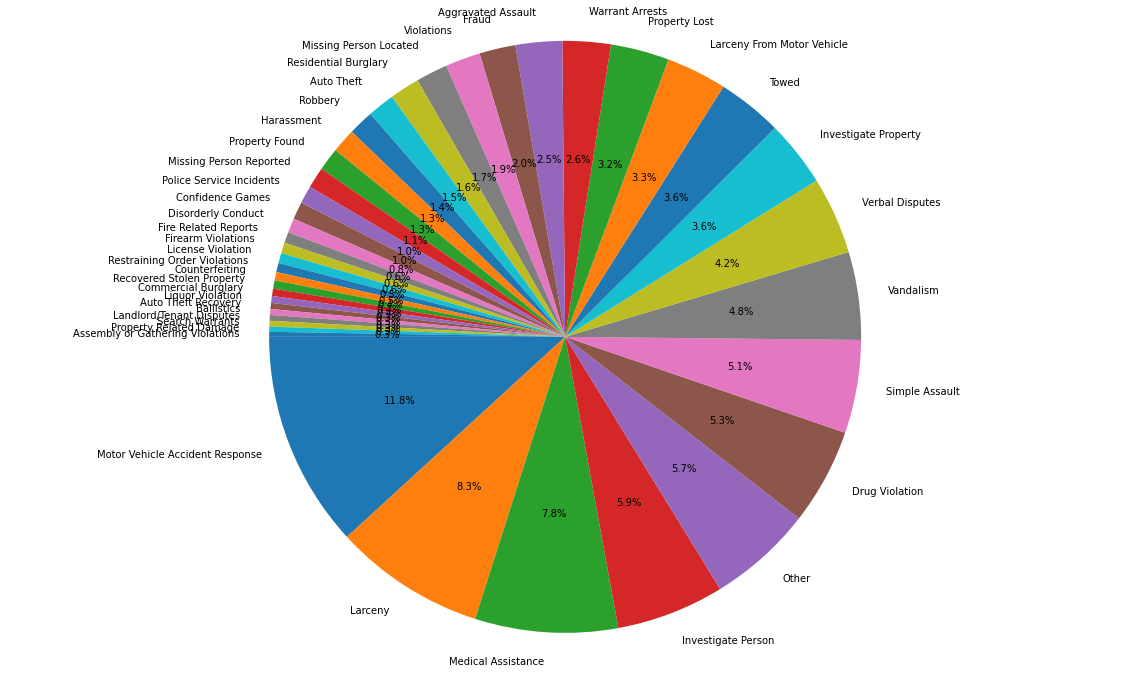

In [25]:
# 1000 den fazla işlenen suçların dağılımı
counts = df["Group"].value_counts()
counts = counts[counts > 1000]
labels = counts.keys().tolist()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize = (20,12))
ax1.pie(sizes, labels = labels, autopct = "%1.1f%%", shadow = False, startangle = 180)
ax1.axis("equal");

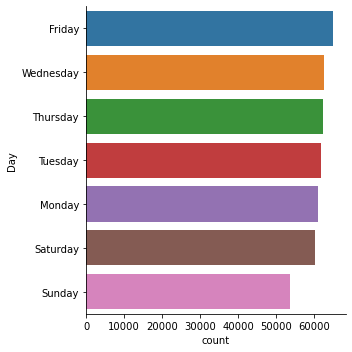

In [26]:
sns.catplot(y = 'Day', 
            kind = 'count', 
            height = 5,
            order = df.Day.value_counts().index, data = df);

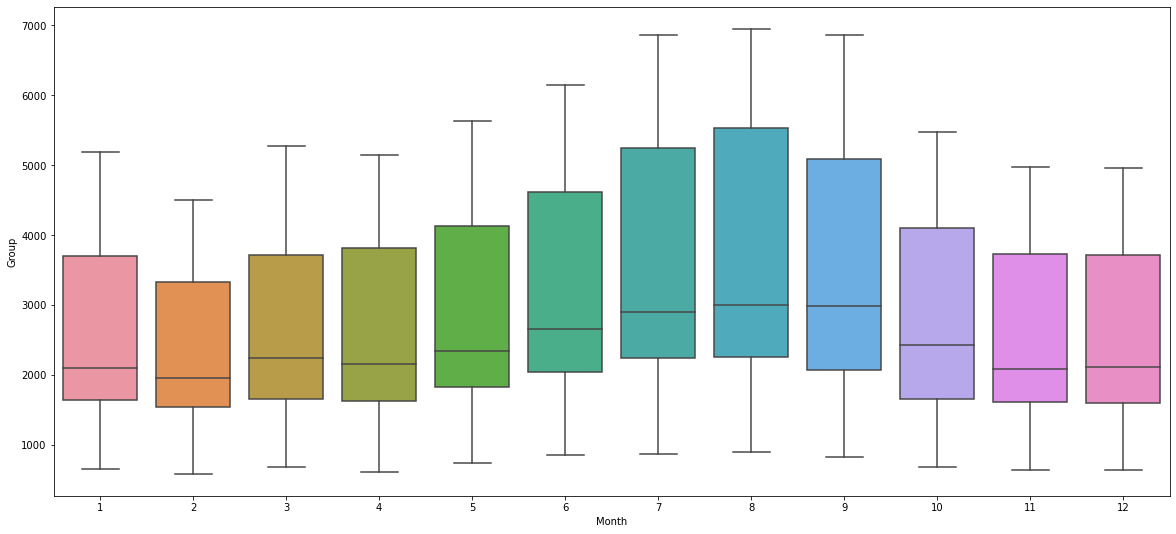

In [27]:
groups = df.groupby(["Month", "District"]).count()
groups = groups.reset_index()
sns.boxplot(x = "Month", y = "Group", data = groups);

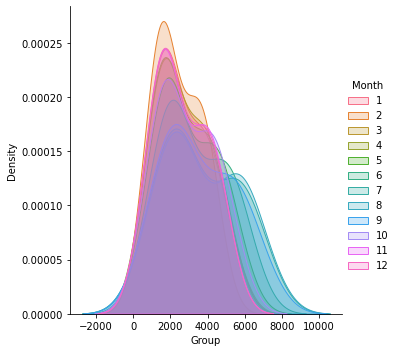

In [28]:
(sns
 .FacetGrid(groups, 
              hue = "Month",
              height = 5)
 .map(sns.kdeplot, "Group",shade = True)
 .add_legend()) ;

In [29]:
def features_eda_object(df, feature):
    y = len(df[feature].unique())
    plt.figure(figsize = [15, min(max(8, y), 12)])
    
    plt.subplot(1, 2, 1)
    x_1 = df.groupby([feature])[feature].count()
    x_1.plot.pie()
    plt.title(feature)
    
    plt.subplot(1,2,2)
    ct = pd.crosstab(df["Year"], df[feature], normalize = 0).reset_index()
    x_2 = ct.melt(id_vars = ["Year"])
    
    sns.barplot(x = feature, y = "value", 
                hue = "Year", data = x_2,
                palette = ["b", "r", "g"], alpha = 0.7)
    plt.title(feature + " - ticks")
    plt.tight_layout();
    
rm_list = ["UCR_PART", "INCIDENT_NUMBER", "Location", "Street"]
type_list = ["object"]
feature_list = []

for feature in df.columns:
    if (feature not in rm_list) & (df[feature].dtypes in type_list):
        feature_list.append(feature)

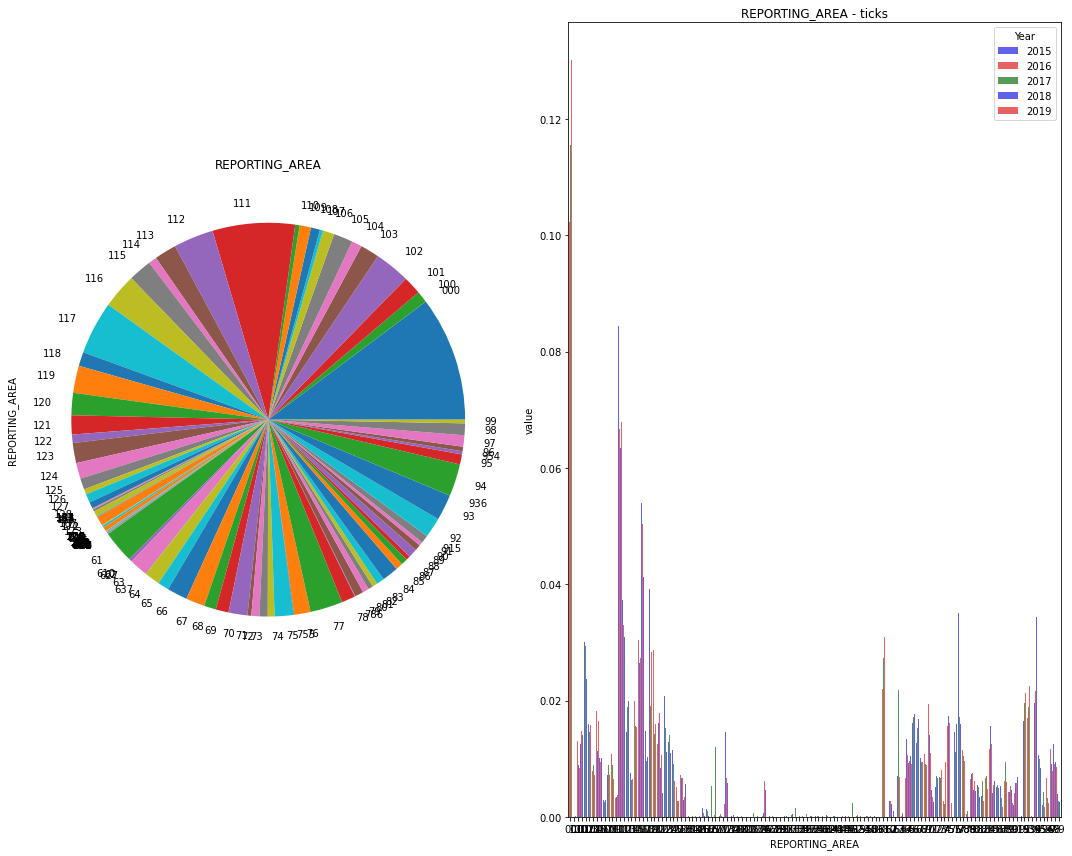

In [30]:
A1_district = df.loc[df.District == "A1"]
for feature in feature_list:
    features_eda_object(A1_district, feature)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426839 entries, 0 to 426838
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   INCIDENT_NUMBER  426839 non-null  object        
 1   OFFENSE_CODE     426839 non-null  int64         
 2   Group            426839 non-null  category      
 3   Description      426839 non-null  category      
 4   District         424670 non-null  category      
 5   REPORTING_AREA   426839 non-null  object        
 6   Date             426839 non-null  datetime64[ns]
 7   Year             426839 non-null  int64         
 8   Month            426839 non-null  int64         
 9   Day              426839 non-null  category      
 10  Hour             426839 non-null  int64         
 11  UCR_PART         426729 non-null  category      
 12  Street           414448 non-null  object        
 13  Lat              399635 non-null  float64       
 14  Long             399635 n

In [32]:
def futures_eda_numeric(df,feature):
    x_1 = df[feature]
    y_1 = df['District']
    data = pd.concat([x_1, y_1], axis = 1)
    plt.figure(figsize = [15, 5])

    ax1 = plt.subplot(1, 2, 1)
    sns.boxplot(x = "District", y = feature, data = data)
    plt.title(feature + " - Boxplot")

    ax2 = plt.subplot(1, 2, 2)
    plt.title(feature + " - Density")
    
    p1 = sns.kdeplot(data[data["District"] == "D4"][feature].apply(np.log), color="g", legend=False)
    
    plt.legend(loc = "upper right", labels = ["0"])

    plt.tight_layout()
    plt.show()
    
dont_list = ["lat", "long"]
types_ = ["int64"]
feature_list = []

for feature in df.columns:
    if (feature not in dont_list) & (df[feature].dtypes in types_) & (len(df[feature].unique()) > 2):
        feature_list.append(feature)

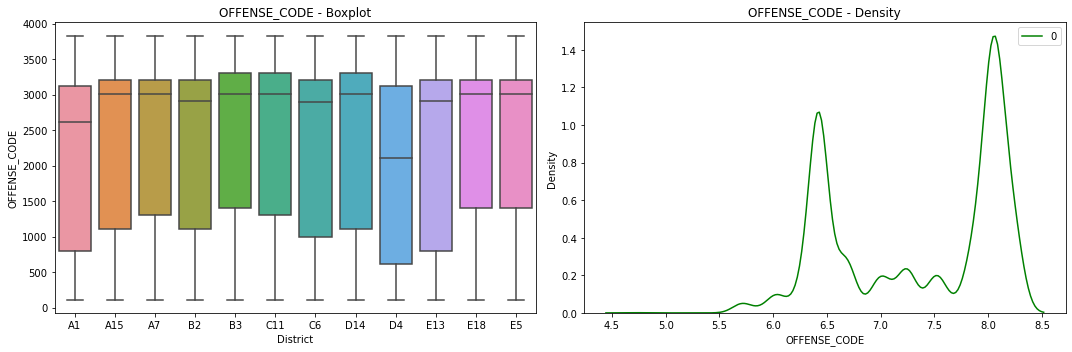

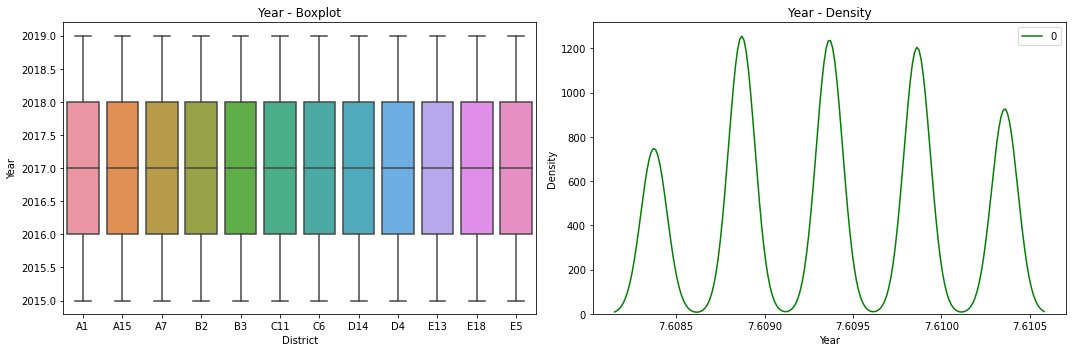

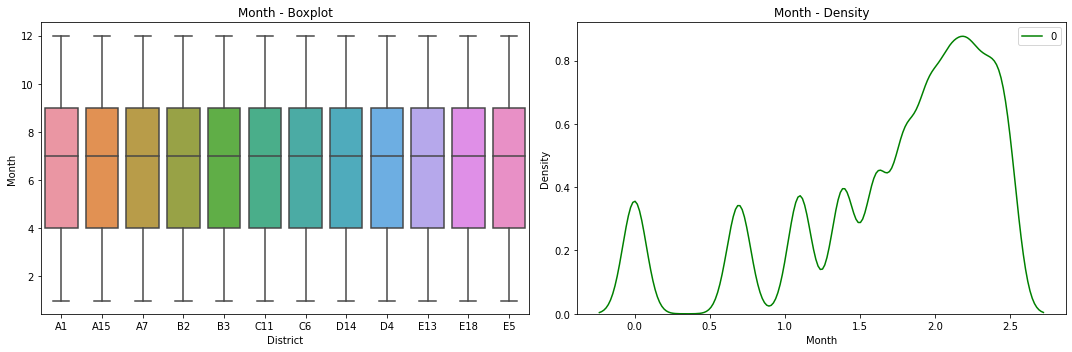

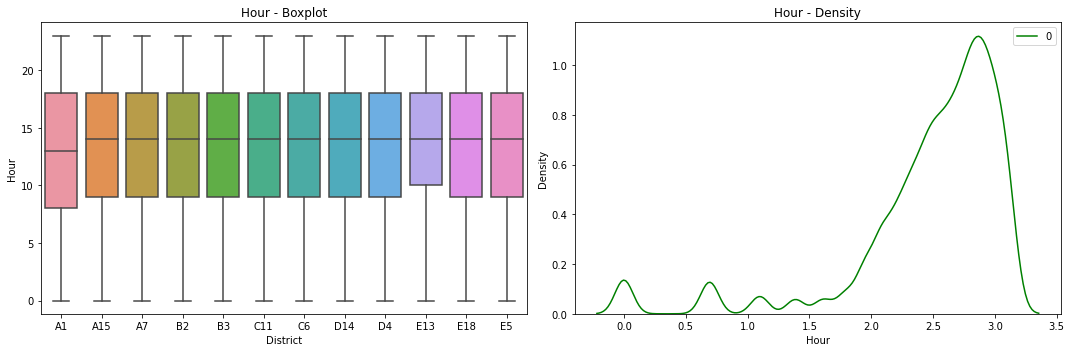

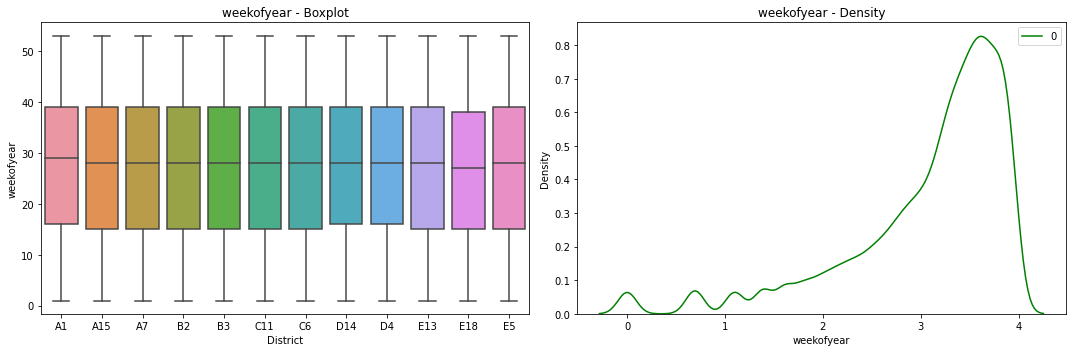

In [33]:
df_ = df.dropna().copy()

for feature in feature_list:
    futures_eda_numeric(df_, feature)

In [34]:
def get_useless_pairs(df):
    pairs_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_drop.add((cols[i], cols[j]))
    return pairs_drop

def get_top_abs_corrs(df, n=2):
    au_corr = df.corr().abs().unstack(level = -1)
    labels_drop = get_useless_pairs(df)
    au_corr = au_corr.drop(labels = labels_drop).sort_values(ascending=True)
    return au_corr[0:n]

corr_table = pd.DataFrame(get_top_abs_corrs(df.select_dtypes(include=["int64"]), 10), columns = ["Correlation"])
print("   --Top Absolute Correlations--\n")
corr_table

   --Top Absolute Correlations--



Correlation
Month        Hour           0.001253
Hour         weekofyear     0.001422
Year         Hour           0.003742
OFFENSE_CODE Hour           0.012987
             Month          0.015084
             weekofyear     0.017188
             Year           0.039578
Year         Month          0.275046
             weekofyear     0.282024
Month        weekofyear     0.976648

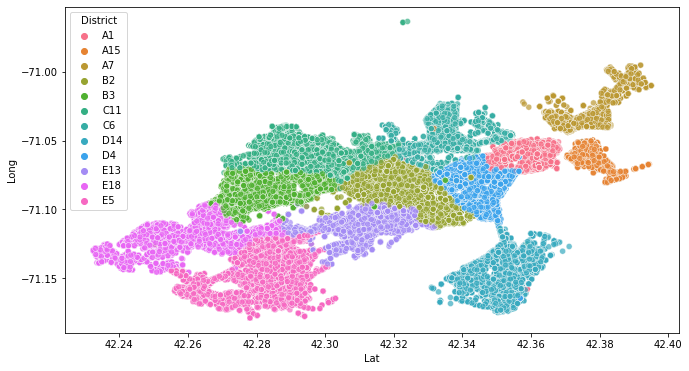

In [35]:
df.Lat.replace(to_replace = -1, value = None, inplace=True)
df.Long.replace(to_replace = -1, value = None, inplace=True)

rcParams["figure.figsize"] = 18, 9

plt.subplots(figsize = (11, 6))
sns.scatterplot(x = "Lat",
                y = "Long",
                hue = "District",
                alpha = 0.7,
                data = df);

## Geographic Information System

In [36]:
A1_district = df.loc[df.District == "A1"][["Lat", "Long"]]
B2_district = df.loc[df.District == "B2"][["Lat", "Long"]]

def show_district_map(district_name_data):
    map_ = Map(location = [42.326145, -71.064083],
               tiles = "OpenStreetMap",
               zoom_start = 11)
    for district_data in district_name_data:
        district_data.Lat.fillna(0, inplace = True)
        district_data.Long.fillna(0, inplace = True)
        
        HeatMap(radius = 16, data = district_data).add_to(map_)
        
    return map_

show_district_map([B2_district, A1_district])
    

In [37]:
ballistic_crimes = df.loc[df.Group == "Ballistics"][["Lat","Long"]]
auto_theft = df.loc[df.Group == "Auto Theft"][["Lat", "Long"]]

def crime_map(crime_name):
    map_ = Map(location = [42.356145, -71.064083], 
                     tiles = "Stamen Toner",
                     zoom_start = 11)
    for crime in crime_name:
        crime.Lat.fillna(0, inplace = True)
        crime.Long.fillna(0, inplace = True)
        
        HeatMap(radius = 16, data = crime).add_to(map_)

    return map_
crime_map([auto_theft])